# HW3 of Data Mining, Programming task

### Reading dataset and examine it

In [ ]:
import pandas as pd #for manipulating and reading the csv dataset
import numpy as np
data = pd.read_csv("data.csv")
data.head() #Showing some rows of the dataset

,x,y
0,54,1
1,56,2
2,102,11
3,3,2
4,24,33


In [ ]:
data.shape

(100, 2)

### Similarity Matrices

In [ ]:
x = data['x']

In [ ]:
y = data['y']
y.shape

(100,)

##### Cosine distance

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
Cosine_M = cosine_similarity(data)
for j in Cosine_M:
    print('\t'.join(map(str, j)))

1.0	0.9998523808600687	0.9960499711989096	0.8421781261720301	0.6030448979321329	0.7770143775847654	0.49502458262248594	0.8383465945217158	0.720077891646251	0.4750174146717198	0.49502458262248594	0.947175259551192	0.8772804878128153	0.9025541785687833	0.5945136204468009	0.9744668252840736	0.8872400716270689	0.9709368364274825	0.9783875130946458	0.9975864739194801	0.7200778916462511	0.5984104529758769	0.49032077640351684	0.7661128498745685	0.36839970754326756	0.33373875470726355	0.6655253950384211	0.8448240304838874	0.7503958802454028	0.4636975596316686	0.7430455396309289	0.5579860478304839	0.2882937996030297	0.943796962061177	0.6987300846395514	0.363019842347875	0.7059158113148186	0.8069037152731307	0.8564803357992835	0.40585067982348394	0.9291966733257407	0.9421941685993316	0.39662110654368027	0.22759751855105226	0.720077891646251	0.909662289899548	0.5672128394629903	0.9960266802373527	0.9985613326164616	0.9989774376047555	0.434047910414839	0.5121297088540782	0.49502458262248594	0.7639

In [ ]:
Cosine_M.shape

(100, 100)

##### Euclidean distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
Euc_D = euclidean_distances(data)
for i in Euc_D:
    print('\t'.join(map(str, i)))

0.0	2.23606797749979	49.03060268852505	51.0098029794274	43.86342439892262	52.773099207835045	46.95742752749558	44.384682042344295	53.0	64.8459713474939	46.95742752749558	24.166091947189145	70.43436661176133	31.04834939252005	49.193495504995376	34.23448553724738	73.66138744281159	107.70329614269008	17.804493814764857	20.09975124224178	68.4470598345904	103.94229168149026	66.76076692189807	89.0	52.20153254455275	64.07027391856539	78.08969202141856	72.94518489934754	36.359317925395686	93.26306878931231	42.7551166528639	95.33624704172071	121.6552506059644	55.44366510251645	67.7421582177598	95.90099061010788	108.85311203635843	34.92849839314596	53.665631459994955	153.39491516996253	54.45181356024793	115.10430052782563	155.32224567009067	102.45974819410792	38.01315561749642	22.80350850198276	67.60177512462228	17.26267650163207	29.427877939124322	7.280109889280518	97.41663102366043	59.23681287847955	144.01388821915754	57.0701322935211	70.09279563550022	109.71326264403953	102.95630140987001	27.

In [ ]:
Euc_D.shape

(100, 100)

## Clustering
#### with Cosine Similarity

In [ ]:
import numpy as np

def getNumFeatures(dataSet):
    # Return the number of features in the dataset (assumes all points have the same number of features)
    return dataSet.shape[1]

def cosine_similarity(point1, point2): #a function to caculate cosine similarity between two points
    vector1 = np.array(point1)
    vector2 = np.array(point2)
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1) #norm of a vector
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

def getRandomCentroids(numFeatures, k):
   #initialize centroids randomly based on the number of features and the desired number of clusters
    centroids = []
    for _ in range(k):
        centroid = np.random.rand(numFeatures) #The same 2nd column of Dataset
        #Randomly chosen centroids
        centroids.append(centroid)
    return centroids

def getLabels(dataSet, centroids):
    labels = []
    for point in dataSet:
        # Calculate cosine similarity between the point and each centroid
        similarities = [cosine_similarity(point, centroid) for centroid in centroids]
        # Assign the label of the closest centroid
        label = np.argmax(similarities) #maximum value of similarities means they
        #belong to that cluster
        labels.append(label)
    return labels
# getLabels and getCentroids functions to assign labels to
# each datapoint based on centroids and update the centroids based on the datapoint labels
def getCentroids(dataSet, labels, k):
  #we iterate over the number of clusters (k). For each cluster, we retrieve the
  #points belonging to that cluster based on their labels. Then, we calculate the
  #mean of those points to obtain the new centroid.
    centroids = []
    for i in range(k):
        cluster_points = [dataSet[j] for j in range(len(dataSet)) if labels[j] == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid) #new centroid
    return centroids

def shouldStop(oldCentroids, centroids, iterations, maxIterations):
  #the shouldStop function checks two conditions for stopping the iteration:
  #if the maximum number of iterations (maxIterations) has been reached and (2)
  #if the centroids have converged
    if iterations >= maxIterations:
        return True
    if np.array_equal(oldCentroids, centroids):
        return True
    return False

iterations = 0
maxIterations = 100

In [ ]:
# Function: K-Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the # dataset which are similar to one another).
def kmeans(dataSet, k):
  # Initialize centroids randomly
   numFeatures = getNumFeatures(dataSet)
   centroids = getRandomCentroids(numFeatures, k)
   # Initialize book keeping vars.
   iterations = 0
   oldCentroids = None
    # Run the main k-means algorithm
   while not shouldStop(oldCentroids, centroids, iterations, maxIterations):
       # Save old centroids for convergence test. Book keeping.
       oldCentroids = centroids
       iterations += 1
       # Assign labels to each datapoint based on centroids
       labels = getLabels(dataSet, centroids)
       # Assign centroids based on datapoint labels
       centroids = getCentroids(dataSet, labels, k)
# We can get the labels too by calling getLabels(dataSet, centroids)
   return centroids, labels

In [ ]:
data_arr = data.values #turn our dataframe into numpy array
k = 4

In [ ]:
final_centroids, final_labels = kmeans(data_arr, k)
print("Final Centroids:", final_centroids)
print("Final Labels:", final_labels)

Final Centroids: [array([60.10344828, 68.03448276]), array([ 35.46875, 101.28125]), array([75.72727273, 46.59090909]), array([80.88235294, 17.47058824])]
Final Labels: [3, 3, 3, 2, 0, 0, 1, 2, 0, 1, 1, 3, 2, 2, 0, 3, 2, 3, 3, 3, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 3, 0, 1, 0, 2, 2, 1, 2, 3, 1, 1, 0, 2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 3, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 3, 2, 3, 0, 1, 1, 1, 1, 3, 0, 0]


### Plotting

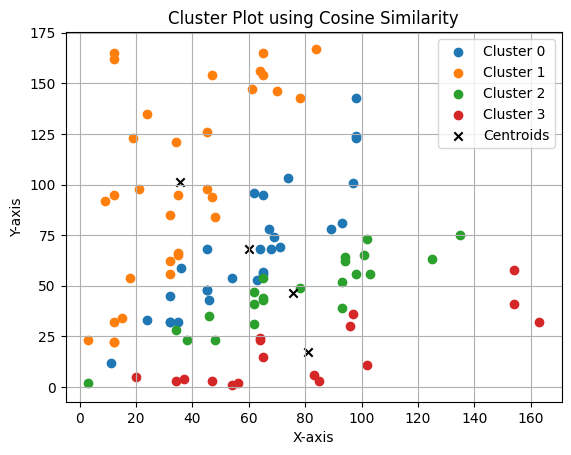

In [ ]:
import matplotlib.pyplot as plt

def plotClusters(dataSet, labels, centroids):
    # Create a scatter plot for each cluster
    #It creates a scatter plot for each cluster by iterating over unique labels
    #and using boolean indexing to retrieve the data points belonging to each cluster.
    for label in np.unique(labels):
        cluster_points = dataSet[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')
    # Plot the centroids
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], marker='x', color='black', label='Centroids')
    # Set plot title and labels
    plt.title('Cluster Plot using Cosine Similarity')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    # Add legend
    plt.legend()
    plt.grid()
    # Show the plot
    plt.show()

plotClusters(data_arr, final_labels, final_centroids)


## Clustering
#### with Euclidean Similarity